In [27]:
import pandas as pd
from nltk.corpus import stopwords
stop= stopwords.words("english")

In [28]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
df=pd.read_csv("../Datasets/fake-news/train.csv")
df=df[~df['text'].isna()]
# Counting the number of words
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
# Counting the number of words in the stoplist
df['stopword_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w in stop]))
df['prop_stop']=df['stopword_count']/df['word_count']

In [32]:
df.head()

,id,title,author,text,label,word_count,stopword_count,prop_stop
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,820,322,0.392683
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,710,286,0.402817
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1266,493,0.389415
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,557,212,0.380610
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1,154,58,0.376623


In [33]:
from scipy import stats


In [35]:
t_stat, p_value = stats.ttest_ind(df[df['label']==1]['prop_stop'].dropna(), df[df['label']==0]['prop_stop'].dropna())
print(f'T-test for proportion of Stop Words: t-statistic={t_stat:.4f}, p-value={p_value:.4f}', 'means:' ,[df[df['label']==1]['prop_stop'].dropna().mean(),df[df['label']==0]['prop_stop'].dropna().mean()])

T-test for proportion of Stop Words: t-statistic=-27.7322, p-value=0.0000 means: [0.34333010436012695, 0.37223690226301737]


In [37]:
t_stat, p_value = stats.ttest_ind(df[df['label']==1]['word_count'].dropna(), df[df['label']==0]['word_count'].dropna())
print(f'T-test for Word Count: t-statistic={t_stat:.4f}, p-value={p_value:.4f}', 'means:' ,[df[df['label']==1]['word_count'].dropna().mean(),df[df['label']==0]['word_count'].dropna().mean()])

T-test for Word Count: t-statistic=-19.8656, p-value=0.0000 means: [641.4709851551956, 878.9965341292]


In [38]:
t_stat, p_value = stats.ttest_ind(df[df['label']==1]['stopword_count'].dropna(), df[df['label']==0]['stopword_count'].dropna())
print(f'T-test for Stop Word Count: t-statistic={t_stat:.4f}, p-value={p_value:.4f}', 'means:' ,[df[df['label']==1]['stopword_count'].dropna().mean(),df[df['label']==0]['stopword_count'].dropna().mean()])

T-test for Stop Word Count: t-statistic=-20.4455, p-value=0.0000 means: [236.27308656256025, 331.28054298642536]


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\guill\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  import sys
C:\Users\guill\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  # Remove the CWD from sys.path while we load stuff.


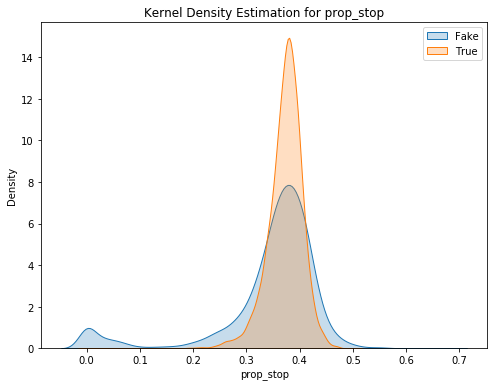

C:\Users\guill\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  import sys
C:\Users\guill\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  # Remove the CWD from sys.path while we load stuff.


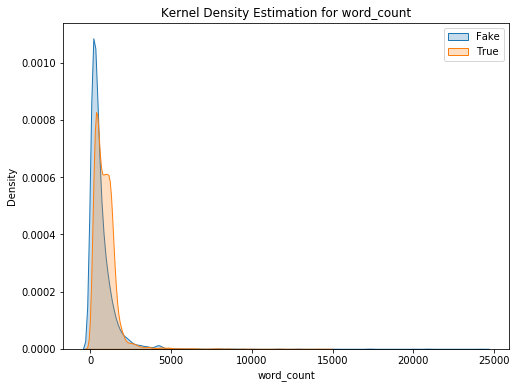

C:\Users\guill\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  import sys
C:\Users\guill\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  # Remove the CWD from sys.path while we load stuff.


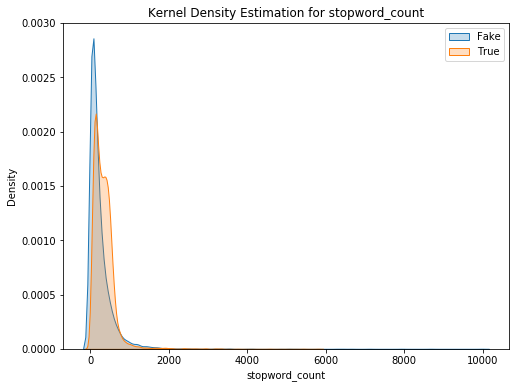

In [40]:
dimensions=['prop_stop', 'word_count', 'stopword_count']
for dimension in dimensions:
    # Initialize the plot
    plt.figure(figsize=(8, 6))
    
    # Plot the KDE for dataframe 1
    sns.kdeplot(data=df[df['label']==1][dimension], label='Fake', shade=True)
    
    # Plot the KDE for dataframe 2
    sns.kdeplot(data=df[df['label']==0][dimension], label='True', shade=True)

    # Set the plot title and labels
    plt.title(f'Kernel Density Estimation for {dimension}')
    plt.xlabel(dimension)
    plt.ylabel('Density')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

In [23]:
df.columns

Index(['Unnamed: 0', 'index', 'title', 'text', 'subject', 'date', 'target',
       'index_true', 'index_fake', 'word_count', 'stopword_count',
       'prop_stop'],
      dtype='object')

In [41]:
df[['id','word_count', 'stopword_count',  'prop_stop']].to_csv('../Datasets/fake-news/stop_words.csv')

# Test

In [42]:
df=pd.read_csv("../Datasets/fake-news/test.csv")
df=df[~df['text'].isna()]
# Counting the number of words
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
# Counting the number of words in the stoplist
df['stopword_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w in stop]))
df['prop_stop']=df['stopword_count']/df['word_count']
df[['id','word_count', 'stopword_count',  'prop_stop']].to_csv('../Datasets/fake-news/stop_words_test.csv')